Pocetni podgraf ima grana: 463


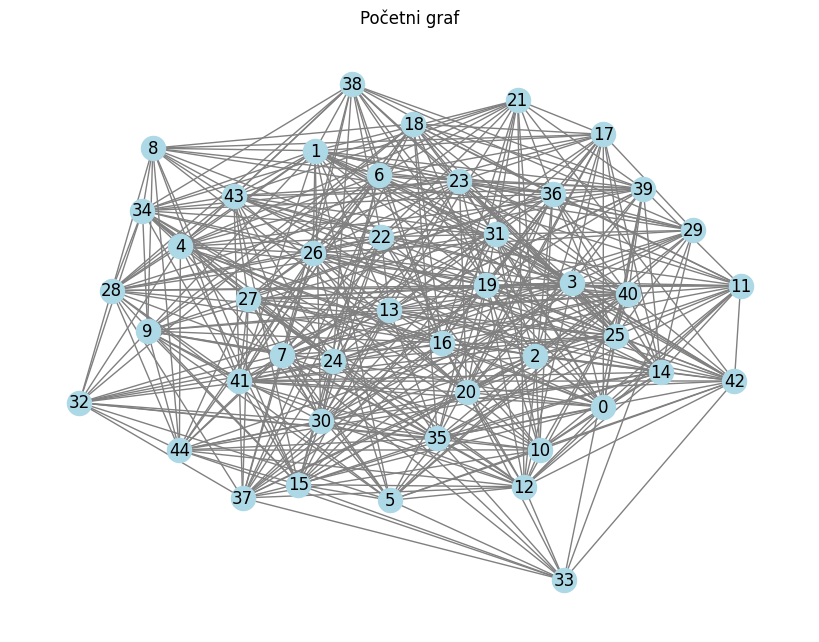

In [41]:
%run algorithms.ipynb

In [42]:
def ucitaj_grafove_iz_dir(direktorijum='data_sets'):
    ucitani_grafovi = []

    for ime_fajla in os.listdir(direktorijum):
        if ime_fajla.endswith(".pkl"):
            putanja = os.path.join(direktorijum, ime_fajla)
            with open(putanja, 'rb') as file:
                ucitani_graf = pickle.load(file)
                ucitani_grafovi.append(ucitani_graf)

    return ucitani_grafovi

In [43]:
ucitani_grafovi = ucitaj_grafove_iz_dir()

In [44]:
def ispisi_informacije_o_grafu(indeks,bf = False):
    direktorijum='data_sets'
    ime_fajla = f'graf_{indeks}.pkl'
    putanja = os.path.join(direktorijum, ime_fajla)

    if os.path.exists(putanja):
        with open(putanja, 'rb') as file:
            ucitani_graf = pickle.load(file)
            print(f"Informacije o grafu {indeks}:")
            print(f"  Broj čvorova: {len(ucitani_graf.nodes)}")
            print(f"  Broj grana: {len(ucitani_graf.edges)}\n")
            final_solution1, final_solution2 = vns_algorithm(ucitani_graf, 4, 10)
            print(f'Broj grana prvog vns resenja je: {len(final_solution1.edges)} a broj grana drugog vns resenja je {len(final_solution2.edges)}\n')
            if bf is True:
                optimal_solution = brute_force_min_k_connected_subgraph(ucitani_graf, 4)
                print(f'Broj grana optimalnog resenja je: {len(optimal_solution.edges)}')
            final_solution, elapsed_time_greedy = greedy_algorithm(ucitani_graf, 4, 50)
            print(f'Broj grana greedy resenja je: {len(final_solution.edges)}')
            print(f'Vreme potrebno za izvrsavanje greedy algoritma: {elapsed_time_greedy:.3f} seconds')
            
            
    else:
        print(f"Graf {indeks} ne postoji u direktorijumu {direktorijum}.")

In [ ]:
for i in range(1,11):
    bf = True
    if i > 2:
        bf = False
    ispisi_informacije_o_grafu(i,bf)
    print("-----------------------------------------------------")

Informacije o grafu 1:
  Broj čvorova: 15
  Broj grana: 45

Broj grana prvog vns resenja je: 30 a broj grana drugog vns resenja je 30

